In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as lm


# EDA

In [2]:
df=pd.read_csv('C:\\Users\\pc\\Desktop\\Income\\Videodata.csv')

In [3]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [5]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [6]:
df.duplicated().sum()

24

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32537 non-null  int64 
 1    workclass       32537 non-null  object
 2    fnlwgt          32537 non-null  int64 
 3    education       32537 non-null  object
 4    education-num   32537 non-null  int64 
 5    marital-status  32537 non-null  object
 6    occupation      32537 non-null  object
 7    relationship    32537 non-null  object
 8    race            32537 non-null  object
 9    sex             32537 non-null  object
 10   capital-gain    32537 non-null  int64 
 11   capital-loss    32537 non-null  int64 
 12   hours-per-week  32537 non-null  int64 
 13   native-country  32537 non-null  object
 14   income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


(32537, 15)

In [9]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
##  information
df['age'].max()

90

In [11]:
## the information about the older person
df.iloc[df['age'].idxmax()]

age                            90
 workclass                Private
 fnlwgt                     51744
 education                HS-grad
 education-num                  9
 marital-status     Never-married
 occupation         Other-service
 relationship       Not-in-family
 race                       Black
 sex                         Male
 capital-gain                   0
 capital-loss                2206
 hours-per-week                40
 native-country     United-States
 income                     <=50K
Name: 222, dtype: object

In [12]:
df.iloc[df['age'].idxmin()]


age                            17
 workclass                      ?
 fnlwgt                    304873
 education                   10th
 education-num                  6
 marital-status     Never-married
 occupation                     ?
 relationship           Own-child
 race                       White
 sex                       Female
 capital-gain               34095
 capital-loss                   0
 hours-per-week                32
 native-country     United-States
 income                     <=50K
Name: 106, dtype: object

In [13]:
### want to see the work class and the highest work class 
df[" workclass"].value_counts().sort_values(ascending=False)

 workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [14]:
df[" income"].value_counts().sort_values(ascending=False)

 income
<=50K    24698
>50K      7839
Name: count, dtype: int64

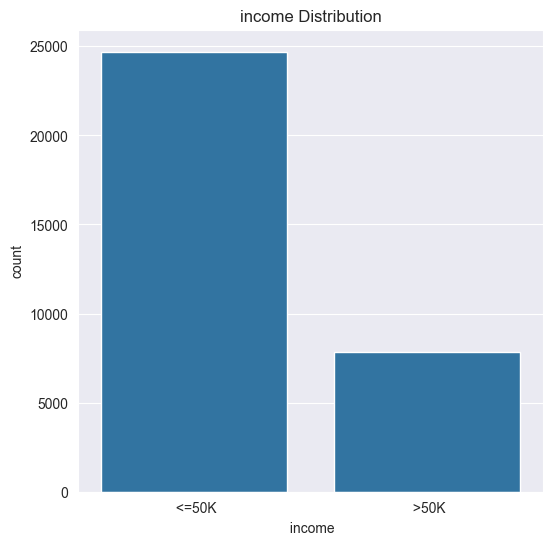

In [15]:
# income column
plt.figure(figsize=(6,6))
sns.countplot(x=" income", data=df,color='skyblue')
plt.title('income Distribution')
plt.show()

In [16]:
df[" education"].value_counts().sort_values(ascending=False)


 education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

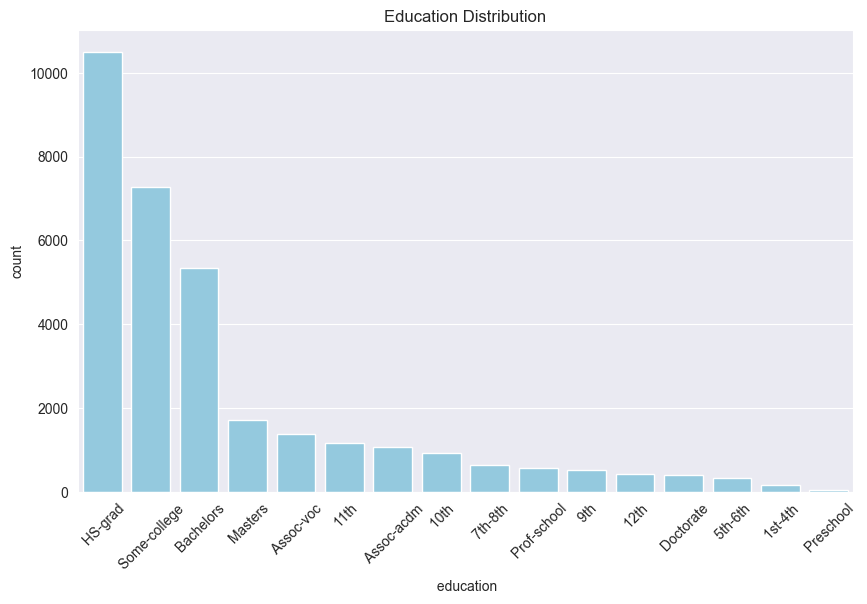

In [17]:
# income column
plt.figure(figsize=(10,6))
sns.countplot(x=" education", data=df, order=df[' education'].value_counts().index,color='skyblue')
plt.title('Education Distribution')
plt.xticks(rotation=45)
plt.show()

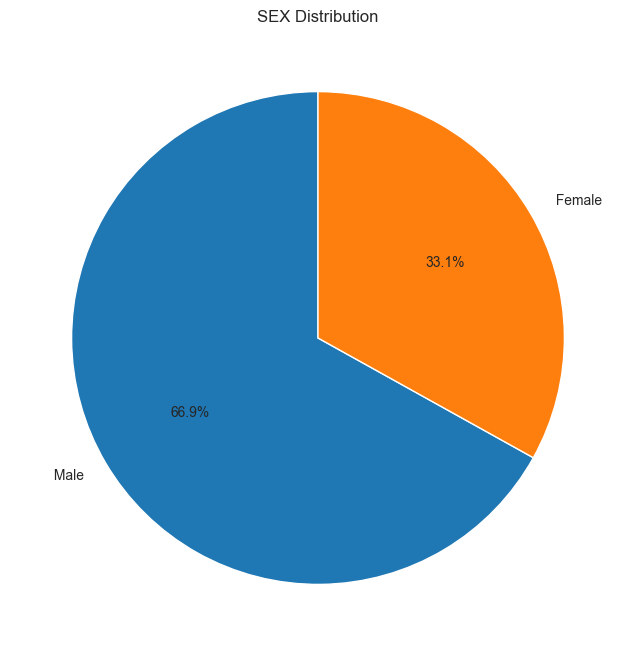

In [18]:
## for sex
plt.figure(figsize=(8,8))
df[' sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('SEX Distribution')
plt.ylabel('')
plt.show()

In [19]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [20]:
## new data set
df=df[['age',' workclass',' education',' marital-status',' occupation',' hours-per-week',' native-country',' income']]

In [21]:
df.head(10)


,age,workclass,education,marital-status,occupation,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,40,Cuba,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,40,United-States,<=50K
6,49,Private,9th,Married-spouse-absent,Other-service,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,45,United-States,>50K
8,31,Private,Masters,Never-married,Prof-specialty,50,United-States,>50K
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,40,United-States,>50K


In [22]:
### lets check for the duplicates again because our columns have changed
df.duplicated().sum()

7202

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
### machine learning process
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [26]:
df[" workclass"] = labelencoder.fit_transform(df[" workclass"])
df[" workclass"].sort_values(ascending=True).value_counts().index

Index([4, 6, 2, 0, 7, 5, 1, 8, 3], dtype='int32', name=' workclass')

In [27]:
df[" marital-status"] = labelencoder.fit_transform(df[" marital-status"])
df[" education"] = labelencoder.fit_transform(df[" education"])
df[" occupation"] = labelencoder.fit_transform(df[" occupation"])
df[" native-country"] = labelencoder.fit_transform(df[" native-country"])
df[" income"] = labelencoder.fit_transform(df[" income"])

In [28]:
df.head(10)

,age,workclass,education,marital-status,occupation,hours-per-week,native-country,income
0,39,7,9,4,1,40,39,0
1,50,6,9,2,4,13,39,0
2,38,4,11,0,6,40,39,0
3,53,4,1,2,6,40,39,0
4,28,4,9,2,10,40,5,0
5,37,4,12,2,4,40,39,0
6,49,4,6,3,8,16,23,0
7,52,6,11,2,4,45,39,1
8,31,4,12,4,10,50,39,1
9,42,4,9,2,4,40,39,1


<Axes: >

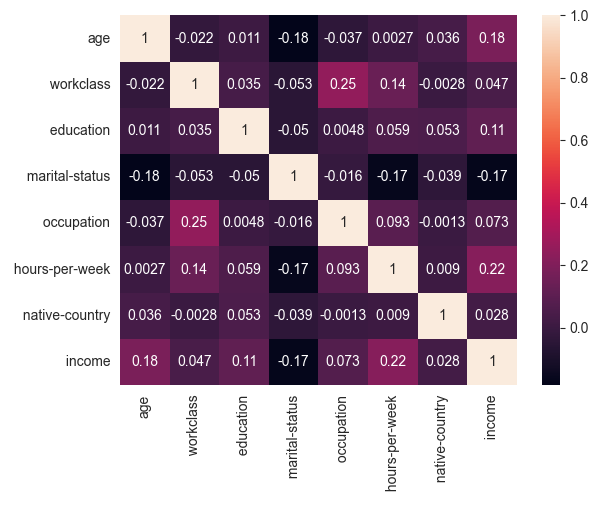

In [29]:
## 
sns.heatmap(df.corr(), annot=True)

In [30]:
## 
### check vif for multi colineraty
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
X = df.drop(df.columns[7], axis=1)
calc_vif(X)### This suggests that native-country might be highly correlated with other variables in the  model.

,variables,VIF
0,age,7.888686
1,workclass,7.423437
2,education,6.841769
3,marital-status,3.285247
4,occupation,3.714348
5,hours-per-week,9.251271
6,native-country,12.889436


In [31]:

X = df.drop([' income',' native-country'],axis=1)
calc_vif(X)
## we will try the both full model and the one without native country

,variables,VIF
0,age,6.827445
1,workclass,7.210412
2,education,6.370010
3,marital-status,3.071757
4,occupation,3.688882
5,hours-per-week,8.490418


In [32]:
## now first lets define x and y then let split the data 
X=df.drop([' income'],axis=1)
Y = df[' income']

In [33]:
##
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [34]:
# Assuming 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
scaler=StandardScaler()
scaled_x_train=scaler.fit_transform(X_train)
scaled_x_test=scaler.fit_transform(X_test)
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(scaled_x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(scaled_x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7330614392843047


In [35]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,5357,260
Actual Yes,1769,215


In [36]:
x=(5354+217)/(5354+299+1731+217)
print(x)

0.7329298776476779


In [37]:
### lets apply knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [38]:
# Create a KNN classifier
knn = KNeighborsClassifier()

# Define a pipeline with a scaler and KNN classifier
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('knn', knn)
])

# Define the parameter grid for grid search
param_grid = {
    'knn__n_neighbors': list(range(1, 30))
}

# Perform grid search with 5-fold cross-validation
cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
cv_classifier.fit(scaled_x_train, y_train)

# Print the best parameters found by grid search
print("Best Parameters:", cv_classifier.best_params_)

# Evaluate the best model on the test set
accuracy = cv_classifier.score(scaled_x_test, y_test)
print("Test Set Accuracy:", accuracy)

Best Parameters: {'knn__n_neighbors': 28}
Test Set Accuracy: 0.7934482304959873


In [39]:
### lets apply random forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the base Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameters grid to search over
param_grid_rf = {
    'n_estimators': [32, 64, 128],
    'max_features': [2, 3],
    'bootstrap': [True, False],
    'oob_score': [True, False]
}

# Create a GridSearchCV object
grid_rfr = GridSearchCV(rf_model, param_grid_rf)

# Fit the grid search object to the training data
grid_rfr.fit(scaled_x_train, y_train.values.ravel())

# Print the best hyperparameters found by the grid search
print(grid_rfr.best_params_)


C:\Users\pc\Desktop\pythonProject py charmt\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\Desktop\pythonProject py charmt\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\Desktop\pythonProject py charmt\.venv\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pc\Desktop\pythonProject p

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': False}


In [40]:
# Get the best Random Forest model from the grid search
best_rf_model = grid_rfr.best_estimator_

# Evaluate the best model on the test data to get the accuracy
accuracy = best_rf_model.score(scaled_x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7697671359031706


In [41]:
###Support Vector Machine (SVM) for classification
from sklearn.svm import SVC

# Define the SVM model
svm_model = SVC()

# Define the hyperparameters you want to tune
param_grid_svm = {
    'C': [0.1, 0, 5, 1],
    'kernel': ['linear', 'poly', 'rbf']
}

# Use GridSearchCV to find the best hyperparameters
grid_svm = GridSearchCV(svm_model, param_grid_svm)
grid_svm.fit(scaled_x_train, y_train.values.ravel())

# Print the best hyperparameters
print(grid_svm.best_params_)

# Evaluate the best model on the test data
best_svm_model = grid_svm.best_estimator_
accuracy = best_svm_model.score(scaled_x_test, y_test)
print("Accuracy:", accuracy)



C:\Users\pc\Desktop\pythonProject py charmt\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pc\Desktop\pythonProject py charmt\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pc\Desktop\pythonProject py charmt\.venv\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\pc\Desktop\pythonProject py charmt\.venv\Lib\site-packages\sklearn\base.py", line 666, in _val

{'C': 5, 'kernel': 'rbf'}
Accuracy: 0.7873963952111565


In [42]:
def perdiction(newentry):
    predictions = cv_classifier.predict(newentry.reshape(1, -1))
    if predictions == 0:
        return "below or 50k"
    else:
        return "above 50k"

new_index = np.array([40, 3, 10, 2, 6, 40, 30])

# Make sure to replace cv_classifier with your actual trained KNN model
print("income perdiction of the new index is :{}.".format(perdiction(new_index)))


income perdiction of the new index is :below or 50k.
